In [ ]:
!pip install pyhealth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.8/113.8 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 11.6 MB/s eta 0:00:00


### **Instruction on [pyhealth.data](https://pyhealth.readthedocs.io/en/latest/api/data.html)**
- **[README]**: This module defines the basic data structures in PyHealth.
- **[Structures]**:
  - `Event` is the info structure for a single clinical event
  - `Visit` is the info structure for a single clinical visit
  - `Patient` is the info structure for a single patient

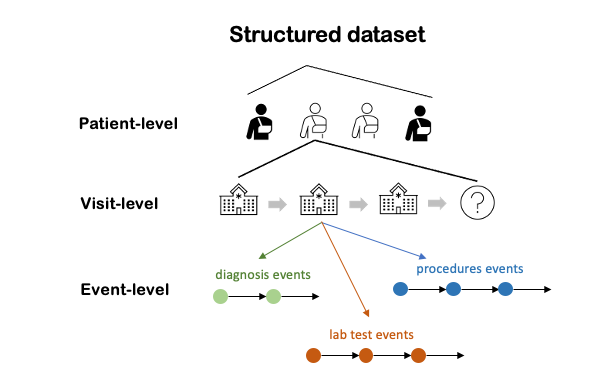

### **[pyhealth.data.Event](https://pyhealth.readthedocs.io/en/latest/api/data/pyhealth.data.Event.html)**
- Contains information about a single event.

- **[Arguments]**:
  - ``code`` – str, code of the event (e.g., “428.0” for heart failure)
  - ``table`` – str, str, name of the table where the event is recorded. E.g., “DIAGNOSES_ICD”.
  - ``vocabulary`` – str, vocabulary of the code (e.g., ‘ICD9CM’, ‘ICD10CM’, ‘NDC’).
  - ``visit_id`` – str, unique identifier of the visit.
  - ``patient_id`` – str, unique identifier of the patient.
  - ``timestamp`` – Optional[datetime], timestamp of the event. Defaults to None.
  - ``**attr`` – optional attributes of the event. Attributes to add to visit as key=value pairs.
- **[Attributes]**: to show additional attributes
    - ``attr_dict``: show the information stored in ****attr**



In [ ]:
from pyhealth.data import Event
from datetime import datetime

# create an event
event1 = Event(
    code="428.0",
    table="DIAGNOSES_ICD",
    vocabulary="ICD9CM",
    visit_id="v001",
    patient_id="p001",
    timestamp=datetime.now(),
)

print(event1)

Event from patient p001 visit v001:
	- Code: 428.0
	- Table: DIAGNOSES_ICD
	- Vocabulary: ICD9CM
	- Timestamp: 2023-02-17 21:39:27.129004


You can also add any additional attributes as key=value pairs.

In [ ]:
# event2 contains an additional attributes
event2 = Event(
    code="00069153041",
    table="PRESCRIPTIONS",
    vocabulary="NDC",
    visit_id="v001",
    patient_id="p001",
    timestamp=datetime.now(),
    active_on_discharge = True,
)

event2.attr_dict

{'active_on_discharge': True}

**TODO:** create the following event:

- code: 00069153041
- table: PRESCRIPTIONS
- vocabulary: NDC
- visit_id: 130744
- patient_id: 103
- timestamp: 2019-08-12 00:00:00
- dosage: 250 mg

Note that try to create 2 additional attributes dosage and dosage_unit.

In [ ]:
event3 = Event(
    code="00069153041",
    table="PRESCRIPTIONS",
    vocabulary="NDC",
    visit_id="130744",
    patient_id="103",
    timestamp=datetime.fromisoformat("2019-08-12 00:00:00"),
    dosage = "250mg",
)

event3.attr_dict

{'dosage': '250mg'}

### **[pyhealth.data.Visit](https://pyhealth.readthedocs.io/en/latest/api/data/pyhealth.data.Visit.html)**
- Contains information about a single visit.

- **[Arguments]**:
  - ``visit_id`` – str, unique identifier of the visit.
  - ``patient_id`` – str, unique identifier of the patient.
  - ``encounter_time`` – Optional[datetime], timestamp of visit’s encounter. Defaults to None.
  - ``discharge_time`` – Optional[datetime], timestamp of visit’s discharge. Defaults to None.
  - ``discharge_status`` - Optional, patient’s status upon discharge. E.g., “Alive”, “Dead”. Defaults to None.
  - ``**attr`` – optional attributes of the visit. Attributes to add to visit as key=value pairs.

- **[Atrributes]**
  - `available_tables`: Returns a list of available tables for the visit.
  - `num_events`: Returns the total number of events in the visit.
- **[Methods]**
  - `add_event()`: Adds an event to the visit.
  - `get_evet_list()`: Returns a list of events from a specific table.
  - `get_code_list()`: Returns a list of codes from a specific table.



In [ ]:
from pyhealth.data import Visit
from datetime import datetime, timedelta

# create a visit
visit1 = Visit(
    visit_id="v001",
    patient_id="p001",
    encounter_time=datetime.now() - timedelta(days=2),
    discharge_time=datetime.now() - timedelta(days=1),
    discharge_status='Alive',
)

# add events
visit1.add_event(event1)
visit1.add_event(event2)

# summary
print(visit1)

Visit v001 from patient p001 with 2 events:
	- Encounter time: 2022-12-24 22:57:59.634416
	- Discharge time: 2022-12-25 22:57:59.634430
	- Discharge status: Alive
	- Available tables: ['DIAGNOSES_ICD', 'PRESCRIPTIONS']
	- Event from patient p001 visit v001:
		- Code: 428.0
		- Table: DIAGNOSES_ICD
		- Vocabulary: ICD9CM
		- Timestamp: 2022-12-26 21:32:43.465442
	- Event from patient p001 visit v001:
		- Code: 00069153041
		- Table: PRESCRIPTIONS
		- Vocabulary: NDC
		- Timestamp: 2022-12-26 21:34:06.893092
		- active_on_discharge: True


In [ ]:
print(visit1.available_tables)
print(visit1.num_events)

print(visit1.get_event_list('DIAGNOSES_ICD'))
print(visit1.get_code_list('DIAGNOSES_ICD'))

['DIAGNOSES_ICD', 'PRESCRIPTIONS']
2
[Event with ICD9CM code 428.0 from table DIAGNOSES_ICD]
['428.0']


In [ ]:
# create another instance
event3 = Event(
    code="585.9",
    table="DIAGNOSES_ICD",
    vocabulary="ICD9CM",
    visit_id="v002",
    patient_id="p001",
    timestamp=datetime.now(),
)

visit2 = Visit(
    visit_id="v002",
    patient_id="p001",
    encounter_time=datetime.now() - timedelta(days=1),
    discharge_time=datetime.now(),
    discharge_status='Dead',
)

# add events
visit2.add_event(event3)

# summary
print (visit2)

Visit v002 from patient p001 with 1 events:
	- Encounter time: 2022-12-25 23:08:50.401701
	- Discharge time: 2022-12-26 23:08:50.401707
	- Discharge status: Dead
	- Available tables: ['DIAGNOSES_ICD']
	- Event from patient p001 visit v002:
		- Code: 585.9
		- Table: DIAGNOSES_ICD
		- Vocabulary: ICD9CM
		- Timestamp: 2022-12-26 23:08:50.401625


**TODO:** Gets a list of codes from "DIAGNOSES_ICD" table in visit1.

In [ ]:
visit1.get_code_list(table="DIAGNOSES_ICD")

['428.0']

### **[pyhealth.data.Patient](https://pyhealth.readthedocs.io/en/latest/api/data/pyhealth.data.Patient.html)**
- Contains information about a single patient.

- **[Arguments]**:
  - ``patient_id`` – str, unique identifier of the patient.
  - ``birth_datetime`` – Optional[datetime], timestamp of patient’s birth. Defaults to None.
  - ``death_datetime`` – Optional[datetime], timestamp of patient’s death. Defaults to None.
  - ``gender`` – Optional, gender of the patient. E.g., “M”, “F”. Defaults to None.
  - ``ethnicity`` – Optional, ethnicity of the patient. E.g., “White”, “Black or African American”, “American Indian or Alaska Native”, “Asian”, “Native Hawaiian or Other Pacific Islander”. Defaults to None.
  - ``**attr`` – optional attributes of the patient. Attributes to add to patient as key=value pairs.

- **[Methods]**
  - `add_visit()`: Adds a visit to the patient.
  - `add_event()`: Adds an event to the patient.
  - `get_visit_by_id()`: Returns a visit by visit id.
  - `get_visit_by_index()`: Returns a visit by its index.

- **[Attributes]**
  - `available_tables`: Returns a list of available tables for the patient.

In [ ]:
from pyhealth.data import Patient
from datetime import datetime, timedelta

# patient is a <Patient> instance with many attributes

patient = Patient(
    patient_id="p001",
    birth_datetime=datetime(2012, 9, 16, 0, 0),
    death_datetime=None,
    gender="F",
    ethnicity="White",
)

# add visit
patient.add_visit(visit1)
patient.add_visit(visit2)

print(patient)

Patient p001 with 2 visits:
	- Birth datetime: 2012-09-16 00:00:00
	- Death datetime: None
	- Gender: F
	- Ethnicity: White
	- Visit v001 from patient p001 with 2 events:
		- Encounter time: 2022-12-24 22:57:59.634416
		- Discharge time: 2022-12-25 22:57:59.634430
		- Discharge status: Alive
		- Available tables: ['DIAGNOSES_ICD', 'PRESCRIPTIONS']
		- Event from patient p001 visit v001:
			- Code: 428.0
			- Table: DIAGNOSES_ICD
			- Vocabulary: ICD9CM
			- Timestamp: 2022-12-26 21:32:43.465442
		- Event from patient p001 visit v001:
			- Code: 00069153041
			- Table: PRESCRIPTIONS
			- Vocabulary: NDC
			- Timestamp: 2022-12-26 21:34:06.893092
			- active_on_discharge: True
	- Visit v002 from patient p001 with 1 events:
		- Encounter time: 2022-12-25 23:08:50.401701
		- Discharge time: 2022-12-26 23:08:50.401707
		- Discharge status: Dead
		- Available tables: ['DIAGNOSES_ICD']
		- Event from patient p001 visit v002:
			- Code: 585.9
			- Table: DIAGNOSES_ICD
			- Vocabulary: ICD9CM
	

In [ ]:
print(patient.available_tables)

['PRESCRIPTIONS', 'DIAGNOSES_ICD']


**TODO:** get the second visit from this patient.

In [ ]:
print(patient.get_visit_by_index(1))

Visit v002 from patient p001 with 1 events:
	- Encounter time: 2022-12-25 23:08:50.401701
	- Discharge time: 2022-12-26 23:08:50.401707
	- Discharge status: Dead
	- Available tables: ['DIAGNOSES_ICD']
	- Event from patient p001 visit v002:
		- Code: 585.9
		- Table: DIAGNOSES_ICD
		- Vocabulary: ICD9CM
		- Timestamp: 2022-12-26 23:08:50.401625


In [ ]:
patient.get_visit_by_index(1).get_code_list(table="DIAGNOSES_ICD")

['585.9']

If you find it useful, please give us a star ⭐ (fork, and watch) at https://github.com/sunlabuiuc/PyHealth.

Thanks very much for your support!